# Support Vector Machine

# Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Load and Preprocess the Data

In [2]:
# Load dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")

# Create Binary Target Column

In [3]:
# Create expertise level from reputation
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)

# Convert to binary classification
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High')


# Drop Irrelevant Columns

In [4]:
# Drop unnecessary columns
drop_cols = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date',
    'is_employee', 'account_age_years', 'reputation', 'expertise_level'
]
user_details_data.drop(columns=drop_cols, inplace=True)


# Handle Missing Values and Encode Categorical Columns

In [5]:
# Fill missing values
user_details_data = user_details_data.fillna(0)

# Encode categorical columns
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode target column
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])
user_details_data.drop(columns=['expertise_binary'], inplace=True)


# Train-Test Split and Feature Scaling

In [6]:
# Split features and target
X = user_details_data.drop(columns=['expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# SVM with Linear Kernel

SVM (Linear Kernel) Accuracy: 0.7498568702290076
              precision    recall  f1-score   support

         Low       0.81      0.65      0.72     10479
        High       0.71      0.85      0.77     10481

    accuracy                           0.75     20960
   macro avg       0.76      0.75      0.75     20960
weighted avg       0.76      0.75      0.75     20960



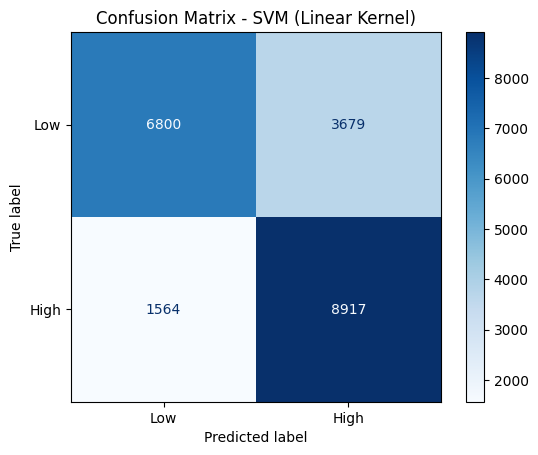

In [7]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_linear = svm_linear.predict(X_test_scaled)
print("SVM (Linear Kernel) Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=["Low", "High"], cmap="Blues")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()


The Support Vector Machine (SVM) model with a linear kernel achieved an accuracy of approximately 74.98% in classifying users into Low and High Expertise categories. The model performed well for High Expertise users with a recall of 0.85 and a precision of 0.71, indicating it successfully identified most high-expertise cases. For Low Expertise, it showed higher precision (0.81) but a lower recall (0.65), suggesting that it often missed users in this category. The confusion matrix confirms this with more misclassifications in the Low class. Overall, the linear SVM offered balanced performance, favoring high expertise identification and serving as a strong baseline for further kernel experiments.

# SVM with Polynomial Kernel

SVM (Polynomial Kernel) Accuracy: 0.7322996183206106
              precision    recall  f1-score   support

         Low       0.74      0.72      0.73     10479
        High       0.73      0.75      0.74     10481

    accuracy                           0.73     20960
   macro avg       0.73      0.73      0.73     20960
weighted avg       0.73      0.73      0.73     20960



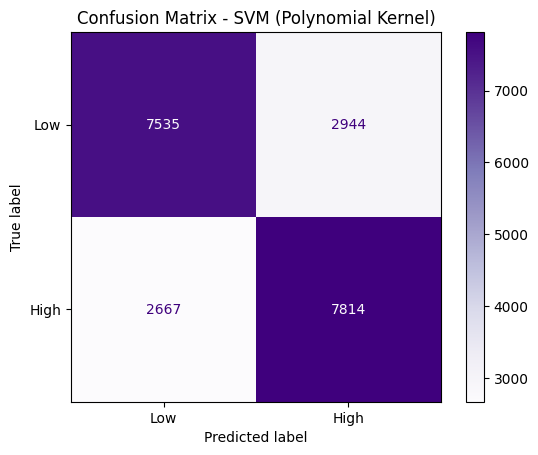

In [8]:
# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_poly = svm_poly.predict(X_test_scaled)
print("SVM (Polynomial Kernel) Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly, display_labels=["Low", "High"], cmap="Purples")
plt.title("Confusion Matrix - SVM (Polynomial Kernel)")
plt.show()


The SVM model with a polynomial kernel achieved an accuracy of approximately 73.23%, showing slightly lower performance than the linear kernel. It demonstrated fairly balanced precision and recall across both Low and High Expertise classes, with f1-scores of 0.73 and 0.74 respectively. The confusion matrix indicates a moderate number of misclassifications in both categories, but the model maintained consistency in identifying users accurately across the board. While the polynomial kernel captures non-linear relationships better than the linear kernel, the improvement in classification performance is marginal in this case. Overall, the polynomial kernel offered a balanced but not significantly superior result compared to the linear model.

# SVM with RBF Kernel

SVM (RBF Kernel) Accuracy: 0.7565362595419848
              precision    recall  f1-score   support

         Low       0.83      0.64      0.73     10479
        High       0.71      0.87      0.78     10481

    accuracy                           0.76     20960
   macro avg       0.77      0.76      0.75     20960
weighted avg       0.77      0.76      0.75     20960



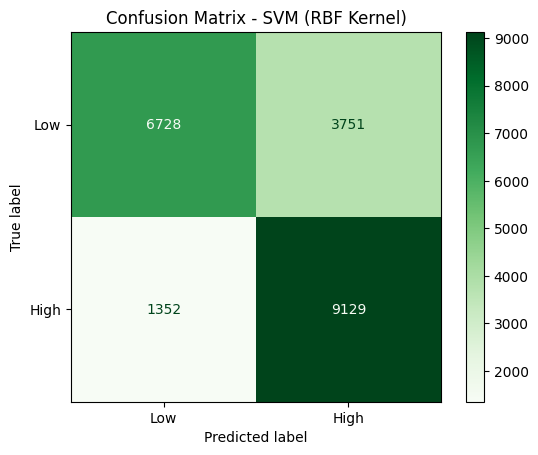

In [9]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("SVM (RBF Kernel) Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf, target_names=["Low", "High"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, display_labels=["Low", "High"], cmap="Greens")
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.show()


The SVM model with the RBF (Radial Basis Function) kernel achieved the highest accuracy among all tested kernels, reaching approximately 75.65%. It showed strong recall for the High Expertise class (0.87) and maintained a balanced performance overall, with a macro F1-score of 0.75. The confusion matrix reveals that the model was particularly effective at correctly identifying High Expertise users, with 9129 correct classifications out of 10,481. While it struggled slightly with the Low Expertise class (recall: 0.64), the higher precision (0.83) for this class suggests fewer false positives. Overall, the RBF kernel demonstrated the best generalization capability and class separation in this task.

# Accuracy Comparison of Kernels

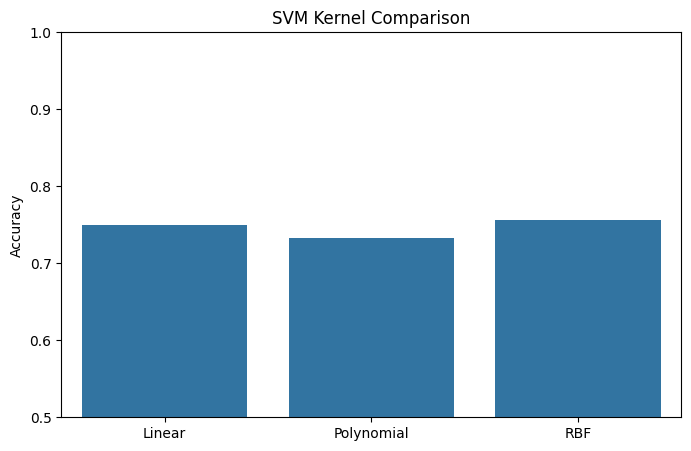

In [10]:
# Compare accuracies
kernel_names = ['Linear', 'Polynomial', 'RBF']
accuracies = [
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_poly),
    accuracy_score(y_test, y_pred_rbf)
]

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=kernel_names, y=accuracies)
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison")
plt.ylim(0.5, 1)
plt.show()


The bar graph provides a visual comparison of the classification accuracy across three different SVM kernels: Linear, Polynomial, and RBF. Among the three, the RBF kernel demonstrated the highest accuracy, slightly outperforming the Linear kernel. The Polynomial kernel had the lowest accuracy, indicating it may not be the best fit for the given dataset. This comparison highlights how kernel choice can significantly impact model performance, with RBF emerging as the most effective for separating the expertise levels in this binary classification task.